# Тема “Обучение без учителя”

### Задание 1





```
Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.
Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
Масштабируйте данные с помощью StandardScaler.
Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.
Постройте диаграмму рассеяния на этих данных.
```

In [1]:
#Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
boston = load_boston()

from matplotlib import pyplot as plt

In [2]:
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [3]:
#Создайте датафреймы X и y из этих данных.
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target

In [4]:
#Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
#с помощью функции train_test_split так, чтобы размер тестовой выборки составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
#Масштабируйте данные с помощью StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [6]:
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.fit_transform(X_test), columns=X_test.columns)

In [7]:
#Постройте модель TSNE на тренировочных данных с параметрами: n_components=2, learning_rate=250, random_state=42.
from sklearn.manifold import TSNE
TSNE_model = TSNE(n_components=2, learning_rate=250, random_state=42)

In [8]:
X_train_TSNE = TSNE_model.fit_transform(X_train_scaled)

print('До:\t{}'.format(X_train_scaled.shape))
print('После:\t{}'.format(X_train_TSNE.shape))


До:	(404, 13)
После:	(404, 2)


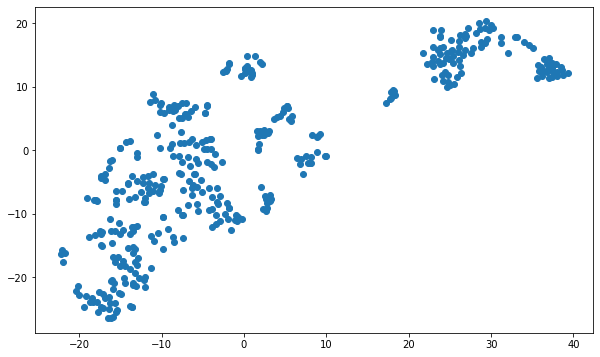

In [9]:
#Постройте диаграмму рассеяния на этих данных.
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = X_train_TSNE[:, 0], y = X_train_TSNE[:, 1])
plt.show()

### Задание 2


```
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера, используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE, и раскрасьте точки из разных кластеров разными цветами.
Вычислите средние значения price и CRIM в разных кластерах.
```



In [10]:
from sklearn.cluster import KMeans

In [11]:
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)

X_train_KM = kmeans.fit_predict(X_train_scaled)

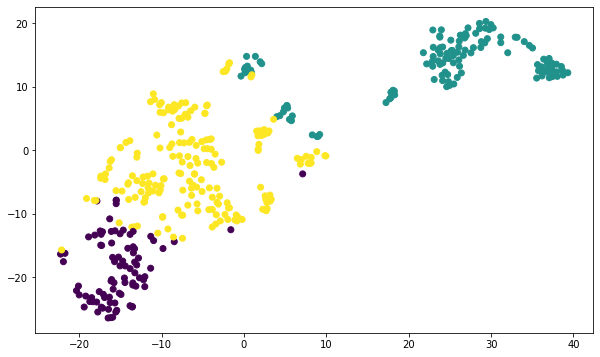

In [12]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = X_train_TSNE[:, 0], y = X_train_TSNE[:, 1], c=X_train_KM)
plt.show()

In [13]:
#Вычислите средние значения price и CRIM в разных кластерах.

for cluster in [0, 1, 2]:
  print('Кластер {}: "CRIM" mean = {}'.format(cluster, np.round(X_train.loc[X_train_KM == cluster, 'CRIM'].mean(), 2)))
for cluster in [0, 1, 2]:
  print('Кластер {}: "Price" mean = {}'.format(cluster, np.round(y_train[X_train_KM == cluster].mean(), 2)))

Кластер 0: "CRIM" mean = 0.07
Кластер 1: "CRIM" mean = 10.8
Кластер 2: "CRIM" mean = 0.42
Кластер 0: "Price" mean = 27.79
Кластер 1: "Price" mean = 16.17
Кластер 2: "Price" mean = 24.96


# *Задание 3

```
Примените модель KMeans, построенную в предыдущем задании, к данным из тестового набора.
Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.
```

In [14]:
X_test_KM = kmeans.fit_predict(X_test_scaled)

In [15]:
for cluster in [0, 1, 2]:
  print('Кластер {}: "CRIM" mean = {}'.format(cluster, np.round(X_test.loc[X_test_KM == cluster, 'CRIM'].mean(), 2)))
for cluster in [0, 1, 2]:
  print('Кластер {}: "Price" mean = {}'.format(cluster, np.round(y_test[X_test_KM == cluster].mean(), 2)))

Кластер 0: "CRIM" mean = 0.08
Кластер 1: "CRIM" mean = 9.42
Кластер 2: "CRIM" mean = 0.22
Кластер 0: "Price" mean = 34.55
Кластер 1: "Price" mean = 16.71
Кластер 2: "Price" mean = 21.72
